#  Building an Image Classifier from Scratch

The main goal of this Project is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 



To complete this lab successfully I have done some research on ImageDataGenerator, At [`ImageDataGenerator` class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and the [`.flow_from_directory` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory). 



## Part 1: Prep Work
### Choosing an Object



<b>In order to proceed the Project I have used car images, which I downloaded from internet, as object and other random images such as image of mountains, different scene and people as not object. <br> 
I have created folder called Image, inside image there is 2 sub folders "Object" and "not object" where car images were placed in object folder, where as other images were present in not object folder. <br><br>
   It was difficult for me to take picture of real object so I decided to take different types of car images from internet and used as a Object, whereas for not-object images I have used random images from My phone's memory, most of which are picture of mountains and scenary.
</b>


In [1]:
#Importing all necessary models 
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The images in the Object and not object directory inside Image folder is splitted into training, testing and validation set in the following step. The splitfolders model is used to split images into train, test and validation set where I have maintained the ratio of 0.625:0.1875:0.1875 to train, validation, and test set so that each set contains 50, 15,15 images from object and not object folders. After splitting the images, the corresponding images are assigned to the train_dir, val_dir, and test_dir folder inside Train-Image folder.

In [2]:
import splitfolders
object_dir = 'C:/Users/elnin/Desktop/DAB300/lab 4/Images'
splitfolders.ratio(object_dir, output="C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image", seed=1337, ratio=(0.625, 0.1875, 0.1875),group_prefix=None)
train_dir = 'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train'
val_dir = 'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val'
test_dir = 'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test'


Copying files: 160 files [00:00, 541.11 files/s]


## Part 2: Using the Original Data

### Dataset Verification

We should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in `train`, `validation`, and `test` folders. 

### Dataset Loading and Processing with Image Data Generators

We should now create image data generators for our training, validation, and test datasets that will allow us to feed them into our model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

We should then use the training data generator to print out some examples of the training images and corresponding labels. 

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that we can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if our model begins overfitting after epoch 15, we should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

### Report Accuracy on Test Set 

Our final step is to make predictions using the test set and report the final test set accuracy. 

In [99]:
# Counting number of images 
import os
img_train_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/object')))
img_train_non_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/non-object')))
print(f"Total Training Images from object and not object directories are: { img_train_obj+ img_train_non_obj}")

img_test_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/object')))
img_test_non_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/non-object')))
print(f"Total Testing Images from object and not object directories are: { img_test_obj+ img_test_non_obj}")

img_val_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val/object')))
img_val_non_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val/non-object')))
print(f"Total Training Images from object and not object directories are: { img_val_obj+ img_val_non_obj}")


Total Training Images from object and not object directories are: 100
Total Testing Images from object and not object directories are: 30
Total Training Images from object and not object directories are: 30


In [100]:
#Resizing size of images to 148 by 148 and set batch size to 32
img_height=148 
img_width=148
batch_size=32

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
datagen = ImageDataGenerator(rescale=1./255) # Divide each pixel by 255 (rescale)

train_dataset = train.flow_from_directory("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/",
                                          target_size=(img_height,img_width),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/",
                                          target_size=(img_height,img_width),
                                          batch_size =batch_size,
                                          class_mode = 'binary')
                                         
val_dataset = test.flow_from_directory("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val/",
                                          target_size=(img_height,img_width),
                                          batch_size =batch_size,
                                          class_mode = 'binary')

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Description:<br> I have used keras ImageDataGenerator as it makes easy to label and load image dataset. I have created three objects for data generator and rescaled the pixel values of images to in between 0 and 1. Then I used these objects to call flow from directory by specifying path of the images in train, test and validation set. No matter whatever the size of original image, I resized the size of image to 148 by 148 and then I specified the batch size to 32.The result from classification would be either Object or not-object.

In [6]:
# Class of classification result for test,train,and val images.
print(test_dataset.class_indices)
print(train_dataset.class_indices)
print(val_dataset.class_indices)

{'non-object': 0, 'object': 1}
{'non-object': 0, 'object': 1}
{'non-object': 0, 'object': 1}


The following block of code display the images from training dataset. The title of each image shows the label of that particular images, which means if the image is from object set then it shows 1 otherwise 0.

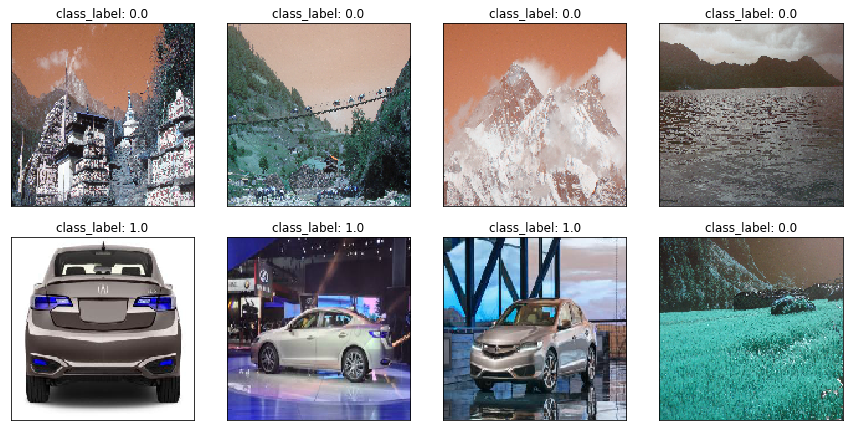

In [7]:
x,y = next(train_dataset)
#print (x.shape)
#output: (8, 224, 224, 3)
#### we can plot the data and see by ourselves
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  x[i] = x[i][:,:,::-1]
  plt.imshow(x[i], interpolation='none')
  plt.title("class_label: {}".format(y[i]))
  plt.xticks([])
  plt.yticks([])

In [32]:
from keras import models
from keras import layers
  
model = keras.Sequential()

# Convolutional layer and maxpool layer 1, 
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the result of layer 4 image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit as activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 1 for Object(Car) or 0 for Not-Object 
model.add(keras.layers.Dense(1,activation='sigmoid'))
  
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)      

In [33]:

model.compile(optimizer ="rmsprop", loss ="binary_crossentropy",metrics =['accuracy'])
                                             


Description: </br>
Here I used `rmsprop optimizer`, which measure how good this model predicts output compared to true output value. As we are dealing with binary classification so I used `binary_crossentrophy` loss function. In order to visualize the data while training I have used accuracy metrics.

In [35]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        mode ="min", patience = 3,
                                        restore_best_weights = True)
  
history = model.fit(train_dataset, batch_size = batch_size, 
                    epochs = 10, validation_data =val_dataset, 
                    callbacks =[earlystopping])

score, acc = model.evaluate(test_dataset,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 0.6904 - accuracy: 0.6139 - val_loss: 0.6555 - val_accuracy: 0.8667
Epoch 2/10
4/4 [==============================] - 6s 2s/step - loss: 0.6900 - accuracy: 0.5545 - val_loss: 0.6493 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.6601 - accuracy: 0.5248 - val_loss: 0.7657 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.6100 - accuracy: 0.7327 - val_loss: 1.8960 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.5161
Test score: 0.6107050776481628
Test accuracy: 0.5161290168762207


Description:<br>
In order to address overfitting I have used `EarlyStopping callbacks model` which prevent model from learning/predicting further if the validation accuracy stops improving. Model accuracy is being monitored by this model and then training process is halted when there is decrement observed in accuracy values. Since model only used 5 epochs so test accuracy is pretty low here.

In [69]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(img_height,img_width))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Object",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("not-object",fontsize=30)

[[0.]]


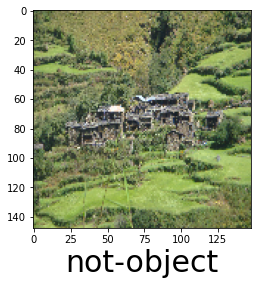

In [70]:
predictImage("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/non-object/DSC00735.jpg")

[[1.]]


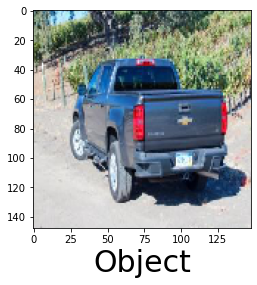

In [71]:
predictImage("C:/Users/elnin/Desktop/New folder/2.jpg")

Description: <br>
In order to check whether My model predict well or  not we have created a method, which predicts whether passed image is Object or not- Object. On the basis of above model it predict images. And here I have used different images apart from training data set to check whether our model predicts well or not.

## Part 3: Using Data Augmentation

### Dataset Verification

We should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Create Image Data Generators

We should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

### Add Data Augmentation 

We should now add data augmentation to your training data generator. All available types of augmentation should be used. 

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and [`.flow()` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset. 

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

### Dataset Verification

In [101]:
# Counting number of images 
import os
img_train_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/object')))
img_train_non_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/non-object')))
print(f"Total Training Images from object and not object directories are: { img_train_obj+ img_train_non_obj}")

img_test_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/object')))
img_test_non_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/non-object')))
print(f"Total Testing Images from object and not object directories are: { img_test_obj+ img_test_non_obj}")

img_val_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val/object')))
img_val_non_obj = (len(os.listdir('C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val/non-object')))
print(f"Total Training Images from object and not object directories are: { img_val_obj+ img_val_non_obj}")

Total Training Images from object and not object directories are: 100
Total Testing Images from object and not object directories are: 30
Total Training Images from object and not object directories are: 30


### Dataset Loading and Processing with Create Image Data Generators

In [102]:
img_height=148 
img_width=148
batch_size=32

train = ImageDataGenerator(rescale=1./255) # Divide each pixel by 255 (rescale)
test = ImageDataGenerator(rescale=1./255) # Divide each pixel by 255 (rescale)
val = ImageDataGenerator(rescale=1./255) # Divide each pixel by 255 (rescale)
datagen = ImageDataGenerator(rescale=1./255) # Divide each pixel by 255 (rescale)

train_dataset = train.flow_from_directory("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/",
                                          target_size=(img_height,img_width),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/",
                                          target_size=(img_height,img_width),
                                          batch_size =batch_size,
                                          class_mode = 'binary')
                                         
val_dataset = test.flow_from_directory("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val/",
                                          target_size=(img_height,img_width),
                                          batch_size =batch_size,
                                          class_mode = 'binary')

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


### Add Data Augmentation 

In [103]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
image_size = (img_height, img_width)
batch_size = 32

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train',  # this is the target directory
        target_size=(148, 148),  # all images will be resized to 148x148
        batch_size=batch_size,
        class_mode='binary')  #  we use binary_crossentropy loss so we need binary labels

validation_generator = test_datagen.flow_from_directory(
        'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/val',
        target_size=(148, 148),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test',
        target_size=(148, 148),
        batch_size=batch_size,
        class_mode='binary')


Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Description: </br>
Here I have used image augumentation, the purpose of the augumentation is to increase range of the training images by transforming it into various stages, so that my model would never see twice the exact same picture, which helps getting rid of model overfitting. In the Augmentation method I used: rotation range, width_shift_range, height_shift_range, rescale, shear_range,zoom_range,horizontal_flip, and fill mode methods. </br>

In the following code, I have used different augmentation tools to present existing images in our training set in different versions



### Rotation:


Found 100 images belonging to 2 classes.


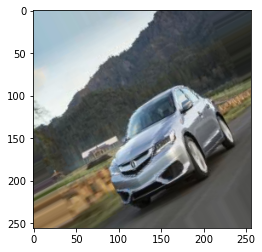

In [107]:
from PIL import Image
from tensorflow.keras import layers
images = 'C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/train/'
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)
x, y = next(generator.flow_from_directory(images, batch_size=1))

plt.imshow(x[0].astype('uint16'));

### Width and Height Shifts

Found 100 images belonging to 2 classes.


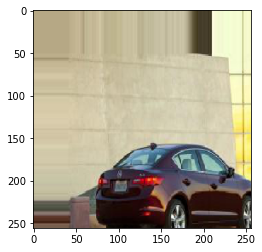

In [112]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)
x, y = next(generator.flow_from_directory(images, batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Brightness

Found 100 images belonging to 2 classes.


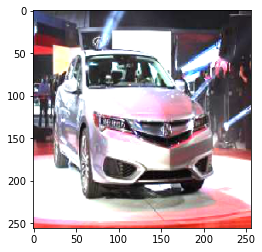

In [113]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory(images, batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Shear Transformation

Found 100 images belonging to 2 classes.


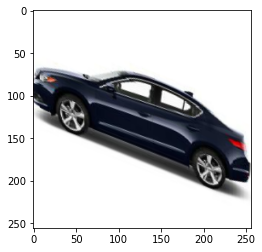

In [115]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory(images, batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Zoom

Found 100 images belonging to 2 classes.


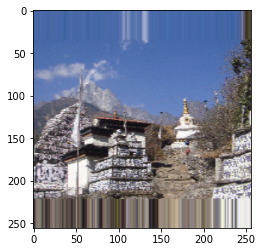

In [117]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)


x, y = next(generator.flow_from_directory(images, batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Channel Shift

Found 100 images belonging to 2 classes.


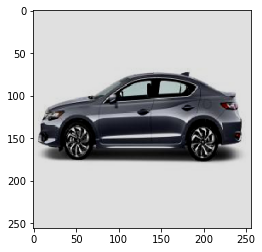

In [121]:

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory(images, batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Flips

Found 100 images belonging to 2 classes.


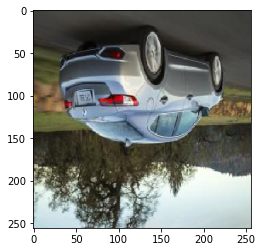

In [125]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory(images, batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Create and Evaluate a Baseline Model

In this model I have used model from part 2 to train augmented data and evaluate validation accuracy. I have used only 5 epoches to see if model performs better and found that my test score increased significantly.

In [78]:
model.compile(optimizer ="rmsprop", loss ="binary_crossentropy",metrics =['accuracy'])
  
history = model.fit(train_dataset, batch_size = batch_size, 
                    epochs = 5, validation_data =val_dataset)

score_aug, acc_aug = model.evaluate(test_dataset,
                            batch_size=batch_size)
print('Test score:', score_aug)
print('Test accuracy:', acc_aug)

Epoch 1/5
4/4 [==============================] - 6s 1s/step - loss: 5.0988 - accuracy: 0.7921 - val_loss: 0.2837 - val_accuracy: 0.8333
Epoch 2/5
4/4 [==============================] - 4s 998ms/step - loss: 0.1848 - accuracy: 0.9109 - val_loss: 7.9585 - val_accuracy: 0.5000
Epoch 3/5
4/4 [==============================] - 4s 1s/step - loss: 2.6642 - accuracy: 0.7921 - val_loss: 0.0612 - val_accuracy: 0.9667
Epoch 4/5
4/4 [==============================] - 4s 1s/step - loss: 0.0697 - accuracy: 0.9703 - val_loss: 0.0922 - val_accuracy: 0.9667
Epoch 5/5
1/1 [==============================] - 0s 0s/step - loss: 0.0083 - accuracy: 1.0000
Test score: 0.008264911361038685
Test accuracy: 0.7677419066429138


After augment images we have got better test score than in previous model. Here test accuracy is almost 77% which is around 25% more than previous one.

### Tune the Model

In [89]:

model1 = keras.Sequential()

# Convolutional layer and maxpool layer 1
model1.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(148,148,3)))
model1.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model1.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model1.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model1.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model1.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model1.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model1.add(keras.layers.Dense(1,activation='sigmoid'))



In [90]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(train_dataset,
            batch_size=4,
            epochs=10,
            verbose=1,
            validation_data =val_dataset)
score_final, acc_final = model1.evaluate(test_dataset,
                            batch_size=24)
print('Test score:', score_final)
print('Test accuracy:', acc_final)


Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 0.8940 - accuracy: 0.4059 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.6847 - accuracy: 0.6337 - val_loss: 0.6826 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 0.6593 - accuracy: 0.5446 - val_loss: 0.6215 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.5420 - accuracy: 0.8020 - val_loss: 0.4264 - val_accuracy: 0.9333
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.5344 - accuracy: 0.7624 - val_loss: 0.5123 - val_accuracy: 0.6333
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 0.3534 - accuracy: 0.8515 - val_loss: 0.3592 - val_accuracy: 0.9333
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.3029 - accuracy: 0.8812 - val_loss: 0.5110 - val_accuracy: 0.6333
Epoch 8/10
4/4 [=========================

The final Test accurucy is 96% which is pretty high.

### Predicting Images using final Model

In [93]:
from tensorflow.keras.preprocessing import image
def predictImage_final(filename):
    img1 = image.load_img(filename,target_size=(148,148))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model1.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Object",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("not-object",fontsize=30)

[[0.]]


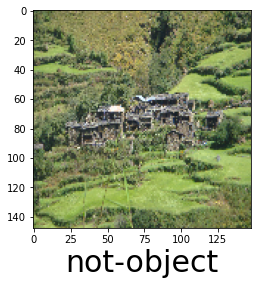

In [94]:
predictImage_final("C:/Users/elnin/Desktop/DAB300/lab 4/Train-Image/test/non-object/DSC00735.jpg")

[[0.]]


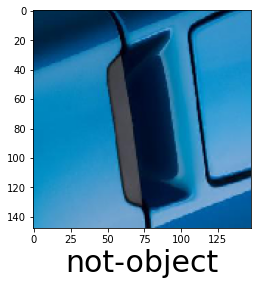

In [97]:
predictImage_final("C:/Users/elnin/Desktop/New Folder/22.jpg")

[[1.]]


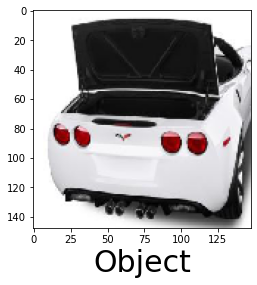

In [98]:
predictImage_final("C:/Users/elnin/Desktop/New Folder/33.jpg")

### References:
In order to complete this lab I have used folllowing blogs as a references
<li>
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb#scrollTo=eR4wwi5Q_UZK</li>
<li> https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</ol>
</li>  
<li>https://keras.io/examples/vision/image_classification_from_scratch/</li>